In [1]:
%run Amazon_file_clean.ipynb



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%run Amazon_file_clean.ipynb


In [5]:
df_amzone_clean=load_and_clean_amazon("Amazon Sale Report.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12044\2418495231.py:18: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [6]:
df_amzone_clean.head()

OrderID      Date                        Status  Amount  \
0  405-8078784-5731545  04-30-22                     Cancelled  647.62   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer  406.00   
2  404-0687676-7273146  04-30-22                       Shipped  329.00   
3  403-9615377-8133951  04-30-22                     Cancelled  753.33   
4  407-1069790-7240320  04-30-22                       Shipped  574.00   

          city        state SalesChannel       Category    B2B  
0       MUMBAI  MAHARASHTRA    Amazon.in            Set  False  
1    BENGALURU    KARNATAKA    Amazon.in          kurta  False  
2  NAVI MUMBAI  MAHARASHTRA    Amazon.in          kurta   True  
3   PUDUCHERRY   PUDUCHERRY    Amazon.in  Western Dress  False  
4      CHENNAI   TAMIL NADU    Amazon.in            Top  False

In [7]:
df_amzone_clean.isnull().sum()

OrderID            0
Date               0
Status             0
Amount          7795
city              33
state             33
SalesChannel       0
Category           0
B2B                0
dtype: int64

In [10]:
df_amzone_clean["Amount"] = df_amzone_clean["Amount"].fillna(0)


In [11]:
df_amzone_clean.isnull().sum()

OrderID         0
Date            0
Status          0
Amount          0
city            0
state           0
SalesChannel    0
Category        0
B2B             0
dtype: int64

In [12]:
df_amzone_clean[["city", "state"]] = df_amzone_clean[["city", "state"]].fillna("Unknown")


In [13]:
df_amzone_clean.describe()

Amount
count  128975.000000
mean      609.363662
std       313.347147
min         0.000000
25%       413.000000
50%       583.000000
75%       771.000000
max      5584.000000

In [14]:
print(df_amzone_clean["Date"].tail(10))


128965    05-31-22
128966    05-31-22
128967    05-31-22
128968    05-31-22
128969    05-31-22
128970    05-31-22
128971    05-31-22
128972    05-31-22
128973    05-31-22
128974    05-31-22
Name: Date, dtype: object


In [17]:
df_amzone_clean["Date"]=pd.to_datetime(df_amzone_clean["Date"],infer_datetime_format=True,errors="coerce")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12044\1325345330.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_amzone_clean["Date"]=pd.to_datetime(df_amzone_clean["Date"],infer_datetime_format=True,errors="coerce")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12044\1325345330.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amzone_clean["Date"]=pd.to_datetime(df_amzone_clean["Date"],infer_datetime_format=True,errors="coerce")


In [18]:
df_amzone_clean["Date"].head(10)

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
5   2022-04-30
6   2022-04-30
7   2022-04-30
8   2022-04-30
9   2022-04-30
Name: Date, dtype: datetime64[ns]

In [19]:
df_amzone_clean["Month"]=df_amzone_clean["Date"].dt.to_period("M")

In [20]:
monthly_sale=df_amzone_clean.groupby("Month")["Amount"].sum()

In [21]:
df_monthly_sale=monthly_sale.reset_index()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_monthly_sale, x="Month", y="Amount")

# Directly labels add karo
ax.bar_label(ax.containers[0], fmt="{:,.0f}", label_type="edge")

# Y-axis ko bhi normal readable format me lana
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
df_monthly_sale

Month       Amount
0  2022-03    101683.85
1  2022-04  28838708.32
2  2022-05  26226476.75
3  2022-06  23425809.38

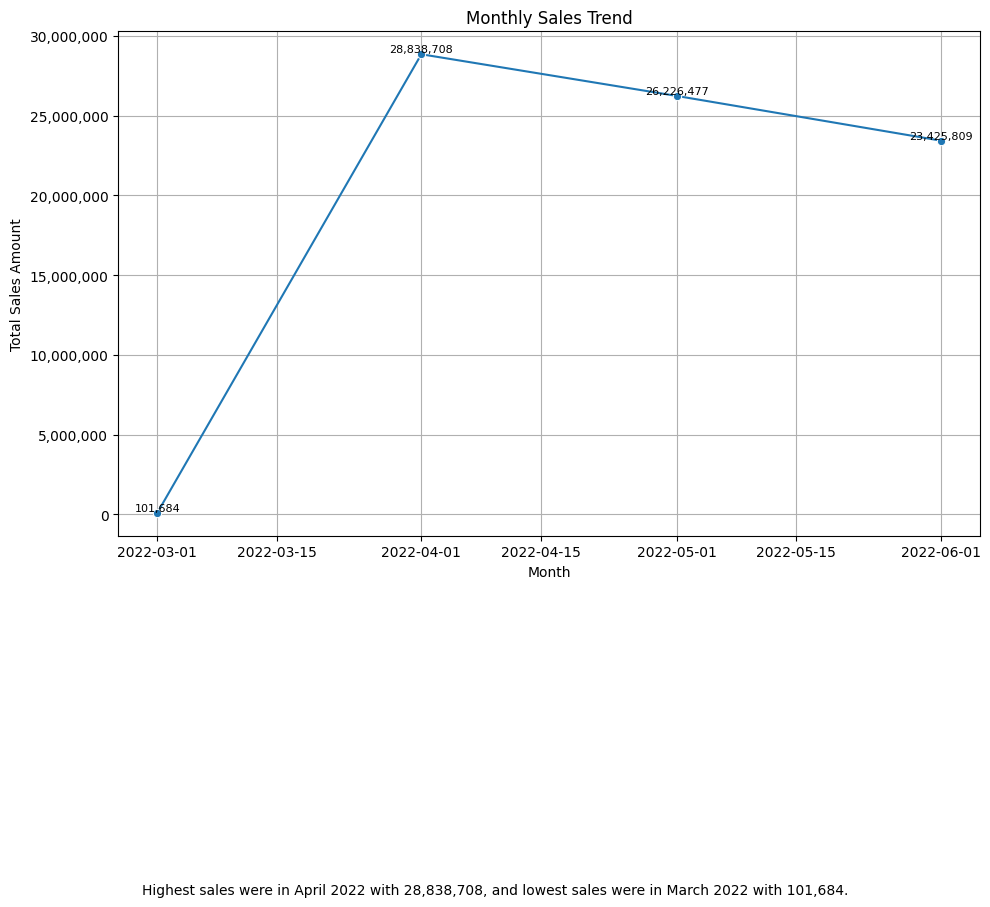

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd

df = pd.DataFrame(df_monthly_sale)


# Month ko datetime me convert karke sort karna

df["Month"] = df["Month"].dt.to_timestamp()
df = df.sort_values("Month")


# Line plot
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df, x="Month", y="Amount", marker="o")

# Title and labels
plt.grid()
plt.tight_layout()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")

# Y-axis readable format
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Har point ke upar values dikhana
for i, row in df.iterrows():
    ax.text(row["Month"], row["Amount"], f'{row["Amount"]:,.0f}', 
            ha='center', va='bottom', fontsize=8, rotation=0)

# Summary generate karna
max_row = df.loc[df["Amount"].idxmax()]
min_row = df.loc[df["Amount"].idxmin()]

summary = f"Highest sales were in {max_row['Month'].strftime('%B %Y')} with {max_row['Amount']:,.0f}, " \
          f"and lowest sales were in {min_row['Month'].strftime('%B %Y')} with {min_row['Amount']:,.0f}."

# Summary ko graph ke niche likhna
plt.figtext(0.5, -0.5, summary, wrap=True, ha='center', fontsize=10)

plt.tight_layout()
plt.show()
